In [5]:
import pandas as pd
import requests
import csv

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
symbol = 'BTCUSDT'
tick_interval = '1d'

In [7]:
def obtener_velas(start='', symbol='BTCUSDT', tick_interval='1d', limit=1000):
    
    base_url = 'https://api.binance.com/'
    endpoint = 'api/v3/klines?'
    
    if start:
        query = 'symbol=' + symbol + '&interval=' + tick_interval + '&startTime=' + str(start) +'&limit='+str(limit)
    else:
        query = 'symbol=' + symbol + '&interval=' + tick_interval +'&limit='+str(limit)
        
    velas = requests.get(base_url + endpoint + query).json()
    
    return velas, velas[-1][6]

In [8]:
def obtener_velas_inicio(symbol, tick_interval):  # Devuelve una lista de velas, cada vela es una lista tb
    
    start=1502942400000  # 17 de agosto de 2017
    _, last_time = obtener_velas(start='', symbol=symbol , tick_interval=tick_interval, limit=1)
    
    velas = []
    while start < last_time:
        i_velas, next_hop = obtener_velas(start, symbol, tick_interval)
        velas = velas + i_velas
        start = next_hop
        
    return velas

In [9]:
velas = obtener_velas_inicio(symbol, tick_interval)
columns=['open_time','open', 'high', 'low','close','volume','close_time','quote','trades',
         'takers_buy_base','takers_buy_quote','ignore']
bitcoin = pd.DataFrame(velas, columns=columns)

In [29]:
bitcoin = bitcoin.sort_values('close_time')
bitcoin.drop_duplicates(keep='last')
bitcoin = bitcoin.astype(float)
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 1662
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open_time         1663 non-null   float64
 1   open              1663 non-null   float64
 2   high              1663 non-null   float64
 3   low               1663 non-null   float64
 4   close             1663 non-null   float64
 5   volume            1663 non-null   float64
 6   close_time        1663 non-null   float64
 7   quote             1663 non-null   float64
 8   trades            1663 non-null   float64
 9   takers_buy_base   1663 non-null   float64
 10  takers_buy_quote  1663 non-null   float64
 11  ignore            1663 non-null   float64
dtypes: float64(12)
memory usage: 168.9 KB


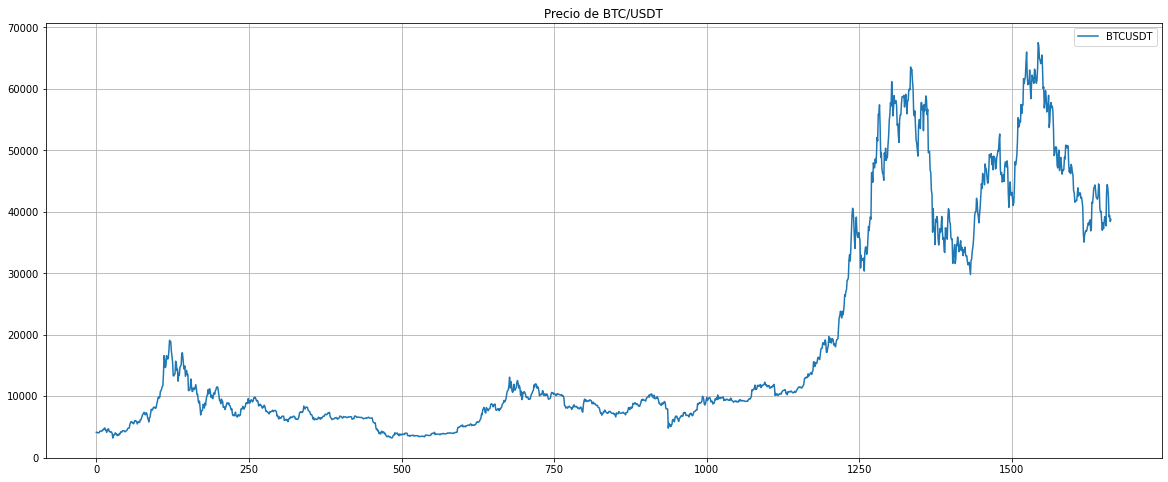

In [30]:
bitcoin['close'].plot(figsize=(20,8), label='BTCUSDT')
plt.title('Precio de BTC/USDT')
plt.legend()
plt.grid()

#### Ahora vamos a comparar el BTC con ADA.


In [13]:
symbol = 'ADAUSDT'
tick_interval = '1d'

In [14]:
def obtener_velas(start='', symbol='ADAUSDT', tick_interval='1d', limit=1000):
    
    base_url = 'https://api.binance.com/'
    endpoint = 'api/v3/klines?'
    
    if start:
        query = 'symbol=' + symbol + '&interval=' + tick_interval + '&startTime=' + str(start) +'&limit='+str(limit)
    else:
        query = 'symbol=' + symbol + '&interval=' + tick_interval +'&limit='+str(limit)
        
    velas = requests.get(base_url + endpoint + query).json()
    
    return velas, velas[-1][6]

In [15]:
def obtener_velas_inicio(symbol, tick_interval):  # devuelve una lista de velas, cada vela es una lista tb
    
    start=1502942400000  # 17 de agosto de 2017
    _, last_time = obtener_velas(start='', symbol=symbol , tick_interval=tick_interval, limit=1)
    
    velas = []
    while start < last_time:
        i_velas, next_hop = obtener_velas(start, symbol, tick_interval)
        velas = velas + i_velas
        start = next_hop
        
    return obtener_velas_inicio

In [ ]:
velas = obtener_velas_inicio(symbol, tick_interval)
columns=['open_time','open', 'high', 'low','close','volume','close_time','quote','trades',
         'takers_buy_base','takers_buy_quote','ignore']
cardano = pd.DataFrame(velas, columns=columns)

In [ ]:
cardano = cardano.sort_values('close_time')
cardano.drop_duplicates(keep='last')
cardano = cardano.astype(float)
cardano.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667 entries, 0 to 1666
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open_time         1667 non-null   float64
 1   open              1667 non-null   float64
 2   high              1667 non-null   float64
 3   low               1667 non-null   float64
 4   close             1667 non-null   float64
 5   volume            1667 non-null   float64
 6   close_time        1667 non-null   float64
 7   quote             1667 non-null   float64
 8   trades            1667 non-null   float64
 9   takers_buy_base   1667 non-null   float64
 10  takers_buy_quote  1667 non-null   float64
 11  ignore            1667 non-null   float64
dtypes: float64(12)
memory usage: 169.3 KB


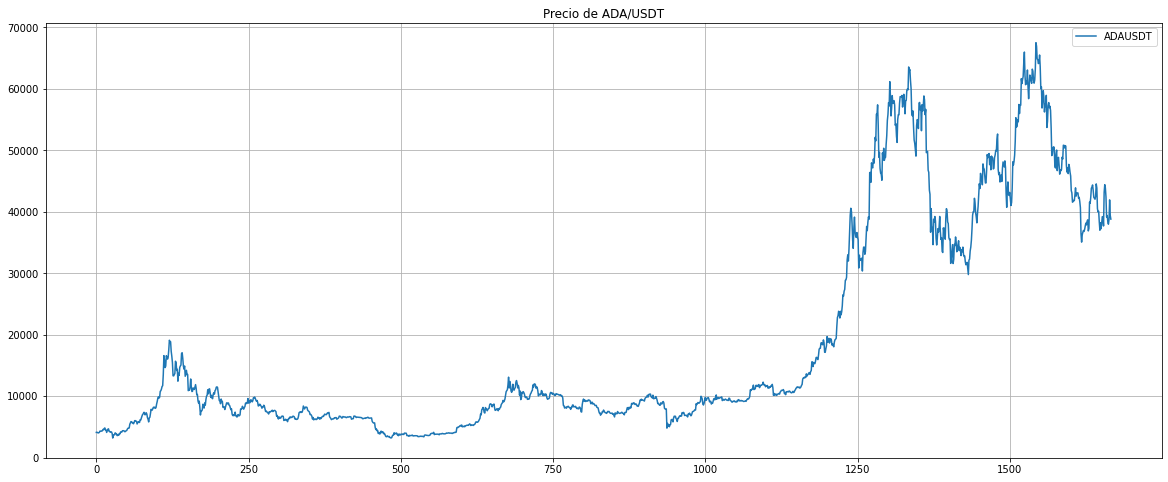

In [12]:
cardano['close'].plot(figsize=(20,8), label='ADAUSDT')
plt.title('Precio de ADA/USDT')
plt.legend()
plt.grid()

In [20]:
cardano['close_time'] = pd.to_datetime(cardano['close_time'], unit='ms')
cardano['close_time'] = cardano['close_time'].dt.tz_localize('utc').dt.tz_convert('Europe/Madrid')
cardano = cardano.set_index('close_time')

In [21]:
cardano.drop('ignore', axis=1, inplace=True)

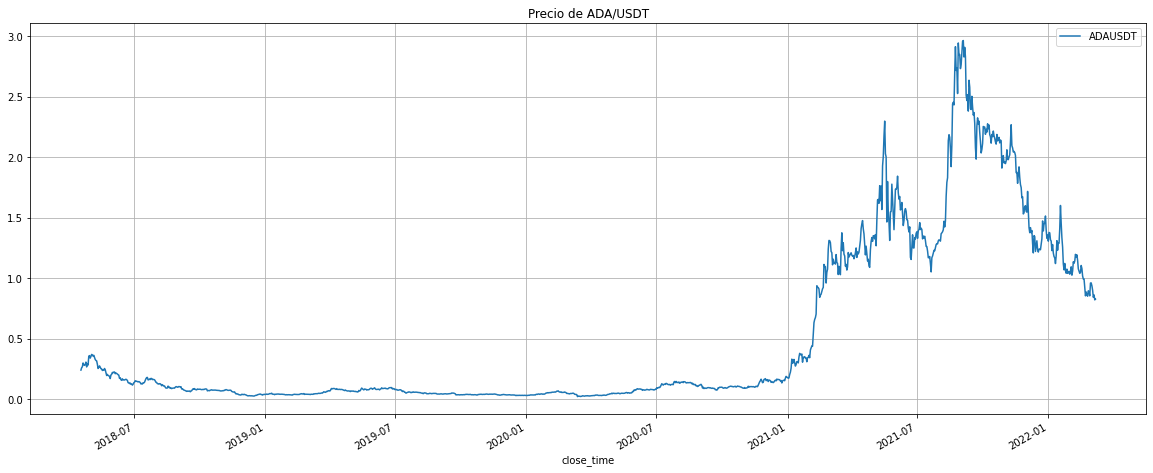

In [40]:
cardano['close'].plot(figsize=(20,8), label='ADAUSDT')
plt.title('Precio de ADA/USDT')
plt.legend()
plt.grid()

In [41]:

from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
bitcoin['volume'].max()

402201.673764

In [49]:

bitcoin['volume'].min()

228.108068

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


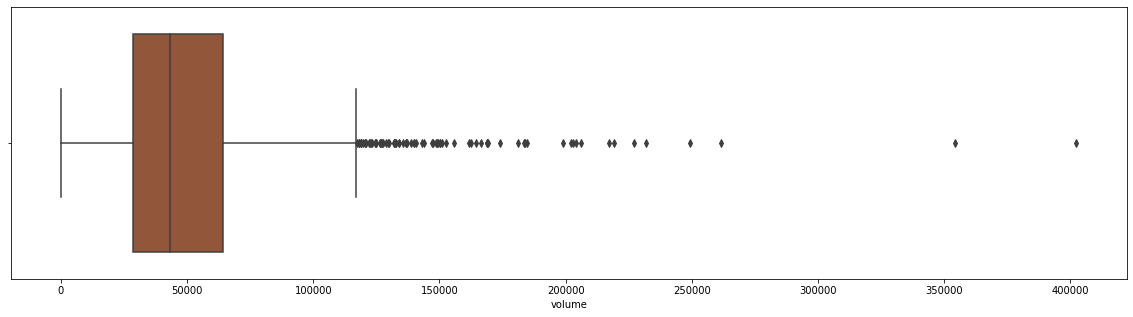

In [53]:
plt.figure(figsize=(20,5))
sns.boxplot(bitcoin["volume"], color="sienna");

In [55]:
cardano['volume'].max()

2261842102.36

In [56]:
cardano['volume'].min()

25407915.5

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Volumen en miles de millones; CARDANO')

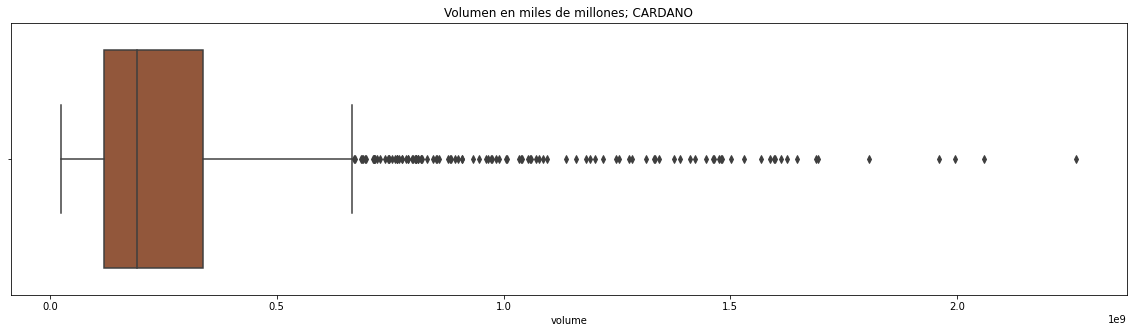

In [62]:
plt.figure(figsize=(20,5))
sns.boxplot(cardano["volume"], color="sienna");
plt.title('Volumen en miles de millones; CARDANO')